# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

Crude Oil Dataset:
This dataset provides information on daily crude oil trading such as volume, price, and the number of contracts outstanding.

Airfare Prediction Dataset:
This dataset provides information on the airfare of certain tickets and other conditions surrouncing the ticket such as time, duration, and route taken.

1. How does the price of crude oil corralate to airfare prices. 
2. How does the duration of the flight corralate to the airfare.
3. How does the volume traded in crude oil corrolate to the open interest of crude oil.
4. How does the open interest of crude oil corrolate to the number of flights on that day.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import time
import seaborn as sns

In [2]:
crude = pd.read_csv('crudeoil.csv')
airfare = pd.read_csv('airfare.csv')

In [3]:
# change type to datetime:
airfare['Date_of_Journey'] = pd.to_datetime(airfare['Date_of_Journey'])
crude['Date'] = pd.to_datetime(crude['Date'])

In [4]:
# Changing dep_date to minutes in a day to be more usable
def convertTime(x):
  num_list = x.split(":")
  x = 60 * int(num_list[0])
  x += int(num_list[1])
  return x
airfare["Dep_Time"] = airfare["Dep_Time"].map(lambda x: convertTime(x))

In [5]:
# Changing flight time to minutes
def convertFlightTime(x):
  num_list = x.split()
  x = 0
  for item in num_list:
    if item[-1] == 'h':
      x += 60 * int(item[:-1])
    if item[-1] == 'm':
      x += int(item[:-1])
  return x

airfare["Duration"] = airfare["Duration"].map(lambda x: convertFlightTime(x))

In [6]:
airfare.Duration

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10683, dtype: int64

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

Airfare:
1. Airline-> String
2. Date_of_Journey-> Date
3. Source-> String
4. Destination-> String
5. Route-> String
6. Dep_Time -> Time 
7. Arrival_Time -> time 
8. Total_Stops-> String 
9. Aditional Info -> String 
10. Price-> Float

Crude Oil:
 1. Last-> Float
 2. Settlement Price-> Float
 3. Change-> Float
 4. % Change-> Float
 5. Bid-> Float
 6. Ask-> Float
 7. Open Interest-> Int
 8. CVol-> Int

In [7]:
airfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  int64         
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  int64         
 8   Total_Stops      10682 non-null  object        
 9   Additional Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Unnamed: 11      0 non-null      float64       
 12  Unnamed: 12      0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 1.1+ MB


In [8]:
crude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2721 non-null   datetime64[ns]
 1   Last              2721 non-null   float64       
 2   Settlement Price  2721 non-null   float64       
 3   Change            2711 non-null   float64       
 4   % Change          2711 non-null   float64       
 5   Bid               2720 non-null   float64       
 6   Ask               2720 non-null   float64       
 7   Open Interest     2721 non-null   object        
 8   CVol              2720 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 191.4+ KB


In [44]:
crude.isna().sum()

Date                 0
Last                 0
Settlement_Price     0
Change              10
Percent_Change      10
Bid                  1
Ask                  1
Open_Interest        0
CVol                 1
Spread               1
dtype: int64

In [45]:
airfare.isna().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  1
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            1
Additional Info        0
Price                  0
Unnamed: 11        10683
Unnamed: 12        10683
dtype: int64

In [9]:
print("Crude oil prices date range: " + str(crude.Date.min()) + " to " + str(crude.Date.max()))

Crude oil prices date range: 2011-05-02 00:00:00 to 2022-02-18 00:00:00


In [10]:
print("Airfare prices date range: " + str(airfare.Date_of_Journey.min()) + " to " + str(airfare.Date_of_Journey.max()))

Airfare prices date range: 2019-01-03 00:00:00 to 2019-12-06 00:00:00


The crude oil dataset has a much larger time frame than the airfare dataset

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

## Airfare Data Dictionary:
1. Airline - The airline which issued the ticket. 
  Possible Values (12):
  * IndiGo
  * Air India
  * Jet Airways
  * SpiceJet
  * Multiple carriers
  * GoAir
  * Vistara
  * Air Asia
  * Vistara Premium economy
  * Jet Airways Business
  * Multiple carriers Premium economy
  * Trujet
2. Date_of_Journey - Date on which the journey took place. Values range from 01/03/2019 to 12/06/2019. There are 40 unique dates in this dataset. 

Text(0, 0.5, 'Frequency')

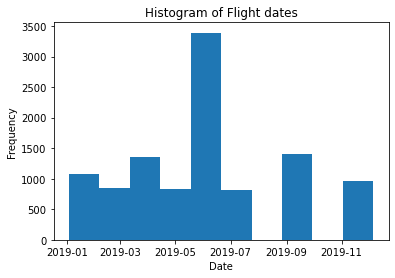

In [11]:
plt.hist(airfare.Date_of_Journey)
plt.title("Histogram of Flight dates")
plt.xlabel("Date")
plt.ylabel("Frequency")


3. Source - City which the flight route begins
  Possible Sources:
  * Banglore
  * Kolkata
  * Delhi
  * Chennai
  * Mumbai
4. Destination - City which the flight route ends
  Possible Destinations - 
  * New Delhi
  * Banglore
  * Cochin
  * Kolkata
  * Delhi
  * Hyderabad
5. Route - Describes thr route of the flight with the airport codes seperated by "->". Example: DEL -> CCU -> BOM -> COK
6. Dep_Time - Time of Departure (24hr time)

Text(0, 0.5, 'Frequency')

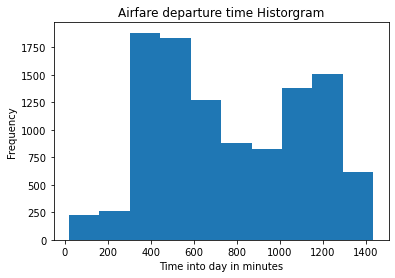

In [12]:
plt.hist(airfare.Dep_Time)
plt.title("Airfare departure time Historgram")
plt.xlabel("Time into day in minutes")
plt.ylabel("Frequency")

7. Arrival_Time - Time of Arrival (24hr time). Some values also have the date of arival if the arival date differes from the departure date (over night flights).
8. Duration of flight - Flight time represented in format: 19h 55m

Text(0, 0.5, 'Freqency')

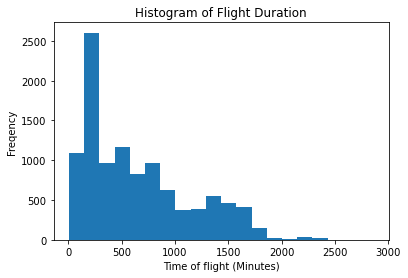

In [13]:
plt.hist(airfare.Duration, bins=20)
plt.title("Histogram of Flight Duration")
plt.xlabel("Time of flight (Minutes)")
plt.ylabel("Freqency")



9. Total_Stops - Total number of stops in the route. 
  Values Include:
  * non-stop
  * 2 stops
  * 1 stop
  * 3 stops
  * NaN
  * 4 stops
10. Additional Info
  Possible Values:
  * No info
  * In-flight meal not included
  * No check-in baggage included
  * 1 Short layover
  * No Info
  * 1 Long layover
  * Change airports
  * Business class
  * Red-eye flight
  * Long layover
11. Price - Price of the flight in INR




Text(0, 0.5, 'Frequency')

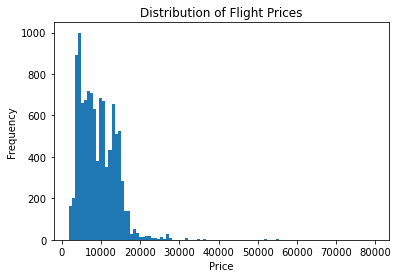

In [14]:
plt.hist(airfare.Price, bins=100)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

## Crude Oil Data Dictionary

1. Date - Date on which the other measurements took place. Values range from 2011-05-02 to 2022-02-18. There are 2,721 unique dates in this dataset.

2. Last - The last daily price of crude oil. These values range from \$12.92 to \$112.98 with a median of \$61.86.

3. Settlement Price - The value of the crude oil determined by buyers and sellers in a market at a particular point in time known as the settlement period. These values range from \$11.57 to \$113.52 with a median of \$61.91.

4. Change - The change from one day to another resulting from (Last - Settlement Price). These changes in the day-to-day of crude ranged from \$-10.24 to \$8.05 with a median of \$0.07 (the negative in -10 comes from the fact that the price fell by \$10 in one single day. 

5. % Change - The change from one day to another as a percentage. These percentages ranged from -43.37% to 27.2% with a change median of 0.11%.

6. Bid - The bid at which people buy the crude oil. These bids range from \$12.71 to \$112.88 with a \$61.8 median.

7. Ask - What the original asking price of the crude oil is. The asking price ranges from \$12.92 to \$113.14 with a median asking price of \$61.86.

8. Open Interest - The total number of outstanding contracts, that have not been settled for an asset. The range of Open Interest is from 19690 to 642793 with a median of 326799.

9. CVol - The volume of crude oil that is available for sale. The volume range is 18811.0 to 2128720.0 that has a median at 382197.5.

In [15]:
#The purpose of this cell is to convert the Open Interest column into usable float values
crude = crude.rename(columns={"Open Interest":"Open_Interest"})
oi_strList = crude['Open_Interest'].tolist()
oi_intList = []
for numConv in oi_strList:
  num = float(numConv.replace(",",""))
  oi_intList.append(num)
del crude["Open_Interest"]
crude.insert(7,"Open_Interest", oi_intList, False)
crude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2721 non-null   datetime64[ns]
 1   Last              2721 non-null   float64       
 2   Settlement Price  2721 non-null   float64       
 3   Change            2711 non-null   float64       
 4   % Change          2711 non-null   float64       
 5   Bid               2720 non-null   float64       
 6   Ask               2720 non-null   float64       
 7   Open_Interest     2721 non-null   float64       
 8   CVol              2720 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 191.4 KB


In [16]:
#This is added here to make sure that the DataSet is usable
crude = crude.rename(columns={"Settlement Price":"Settlement_Price"})
crude = crude.rename(columns={"% Change":"Percent_Change"})

Text(0, 0.5, 'Frequency')

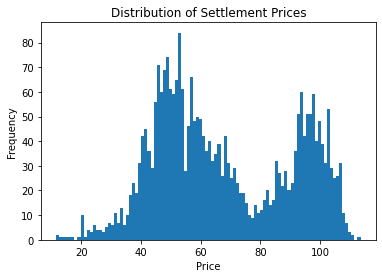

In [17]:
plt.hist(crude.Settlement_Price, bins=100)
plt.title("Distribution of Settlement Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

Text(0, 0.5, 'Volume')

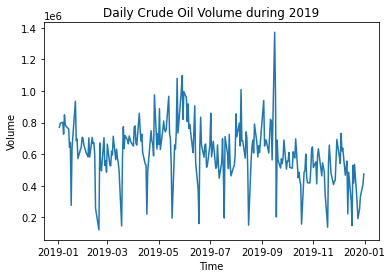

In [18]:
# 540 to 790 is from 1/1/2019 => 12/31/2019
plt.plot(crude[539:790].Date, crude[539:790].CVol)
plt.title("Daily Crude Oil Volume during 2019")
plt.xlabel("Time")
plt.ylabel("Volume")


Text(0, 0.5, 'Frequency')

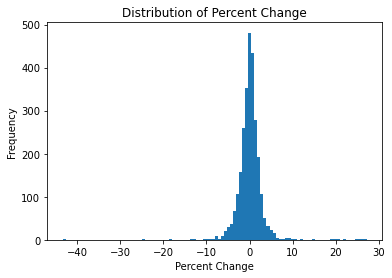

In [19]:
plt.hist(crude.Percent_Change, bins=100)
plt.title("Distribution of Percent Change")
plt.xlabel("Percent Change")
plt.ylabel("Frequency")

In [20]:
print("Crude oil prices date range: " + str(crude.Date.min()) + " to " + str(crude.Date.max()))
print("The number of unique dates are: " + str(crude.Date.nunique()))
print()

print("Crude oil prices range: " + str(crude.Last.min()) + " to " + str(crude.Last.max()))
print("Crude oil prices median: " + str(crude.Last.median()))
print()

print("Crude oil settlement range: " + str(crude.Settlement_Price.min()) + " to " + str(crude.Settlement_Price.max()))
print("Crude oil settlement price median: " + str(crude.Settlement_Price.median()))
print()

print("Crude oil change range: " + str(crude.Change.min()) + " to " + str(crude.Change.max()))
print("Crude oil change median: " + str(crude.Change.median()))
print()

print("Crude oil percent change range: " + str(crude.Percent_Change.min()) + " to " + str(crude.Percent_Change.max()))
print("Crude oil percent change median: " + str(crude.Percent_Change.median()))
print()

print("Crude oil bid range: " + str(crude.Bid.min()) + " to " + str(crude.Bid.max()))
print("Crude oil bid median: " + str(crude.Bid.median()))
print()

print("Crude oil ask range: " + str(crude.Ask.min()) + " to " + str(crude.Ask.max()))
print("Crude oil ask median: " + str(crude.Ask.median()))
print()

print("Crude oil open interest range: " + str(crude.Open_Interest.min()) + " to " + str(crude.Open_Interest.max()))
print("Crude oil open interest median: " + str(crude.Open_Interest.median()))
print()

print("Crude oil volume range: " + str(crude.CVol.min()) + " to " + str(crude.CVol.max()))
print("Crude oil volume median: " + str(crude.CVol.median()))
print()

Crude oil prices date range: 2011-05-02 00:00:00 to 2022-02-18 00:00:00
The number of unique dates are: 2721

Crude oil prices range: 12.92 to 112.98
Crude oil prices median: 61.86

Crude oil settlement range: 11.57 to 113.52
Crude oil settlement price median: 61.91

Crude oil change range: -10.24 to 8.05
Crude oil change median: 0.07

Crude oil percent change range: -43.37 to 27.2
Crude oil percent change median: 0.11

Crude oil bid range: 12.71 to 112.88
Crude oil bid median: 61.8

Crude oil ask range: 12.92 to 113.14
Crude oil ask median: 61.86

Crude oil open interest range: 19690.0 to 642793.0
Crude oil open interest median: 326799.0

Crude oil volume range: 18811.0 to 2128720.0
Crude oil volume median: 382197.5



Text(0, 0.5, 'Frequency')

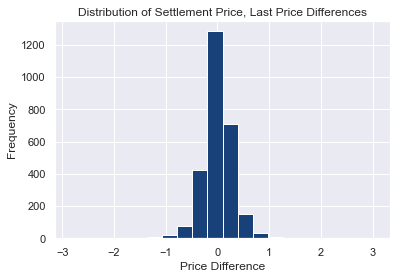

In [42]:
plt.hist(crude.Settlement_Price - crude.Last, bins=20)
plt.title("Distribution of Settlement Price, Last Price Differences")
plt.xlabel("Price Difference")
plt.ylabel("Frequency")

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies).

#### Merging Strategy:
Inner merging the datasets on their dates. This way the merged dataset will only have entries where the dates show up in both datasets. 


In [21]:
print("Airfare prices date range: " + str(airfare.Date_of_Journey.min()) + " to " + str(airfare.Date_of_Journey.max()))

Airfare prices date range: 2019-01-03 00:00:00 to 2019-12-06 00:00:00


In [22]:
# Merge airfare and crude oil on Date_of_Journey and Date:

merged = airfare.merge(crude, left_on='Date_of_Journey', right_on='Date')


In [23]:
len(merged.Date.unique())

31

#### Verification Strategy:
To verify I will count the number of entries in the airfare dataset and check to see if the 

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

### Target Variable
 - Price of Airfare
  - We chose this since it is the most pertinent set of values within the initial dataset we chose

### Predictor Variables
 - Source City
  - Chosen because the city you fly out of can seemingly determine the cost of the flight
 - Destination City
  - Chosen because the city you fly into can often determine the price of the flight
 - Duration of Flight
  - When you are in the air for longer, more crude oil is used, meaning that in theory the flight should be more expensive
 - Total # of Stops
  - The more stops you have to make, it is possible that the cost will go up, although generally the price for more stops makes the flights cheaper
 - Departure Time
  - This variable was chosen becuase we wanted to see if the departure time affected the price
 - Last Price of Crude Oil
  - If the last price of crude oil is higher than now, we want to see if there is a correlation and drop in price in plane flights
 - Open Interest in Crude Oil
  - If there are a lot of open contracts, then in theory the price of crude oil should be lower, and so should the price of flights



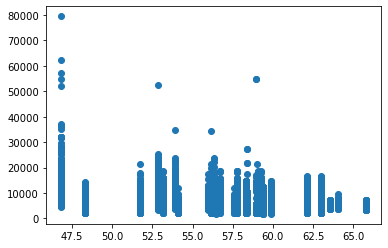

In [24]:
plt.scatter(merged.Last, merged.Price)

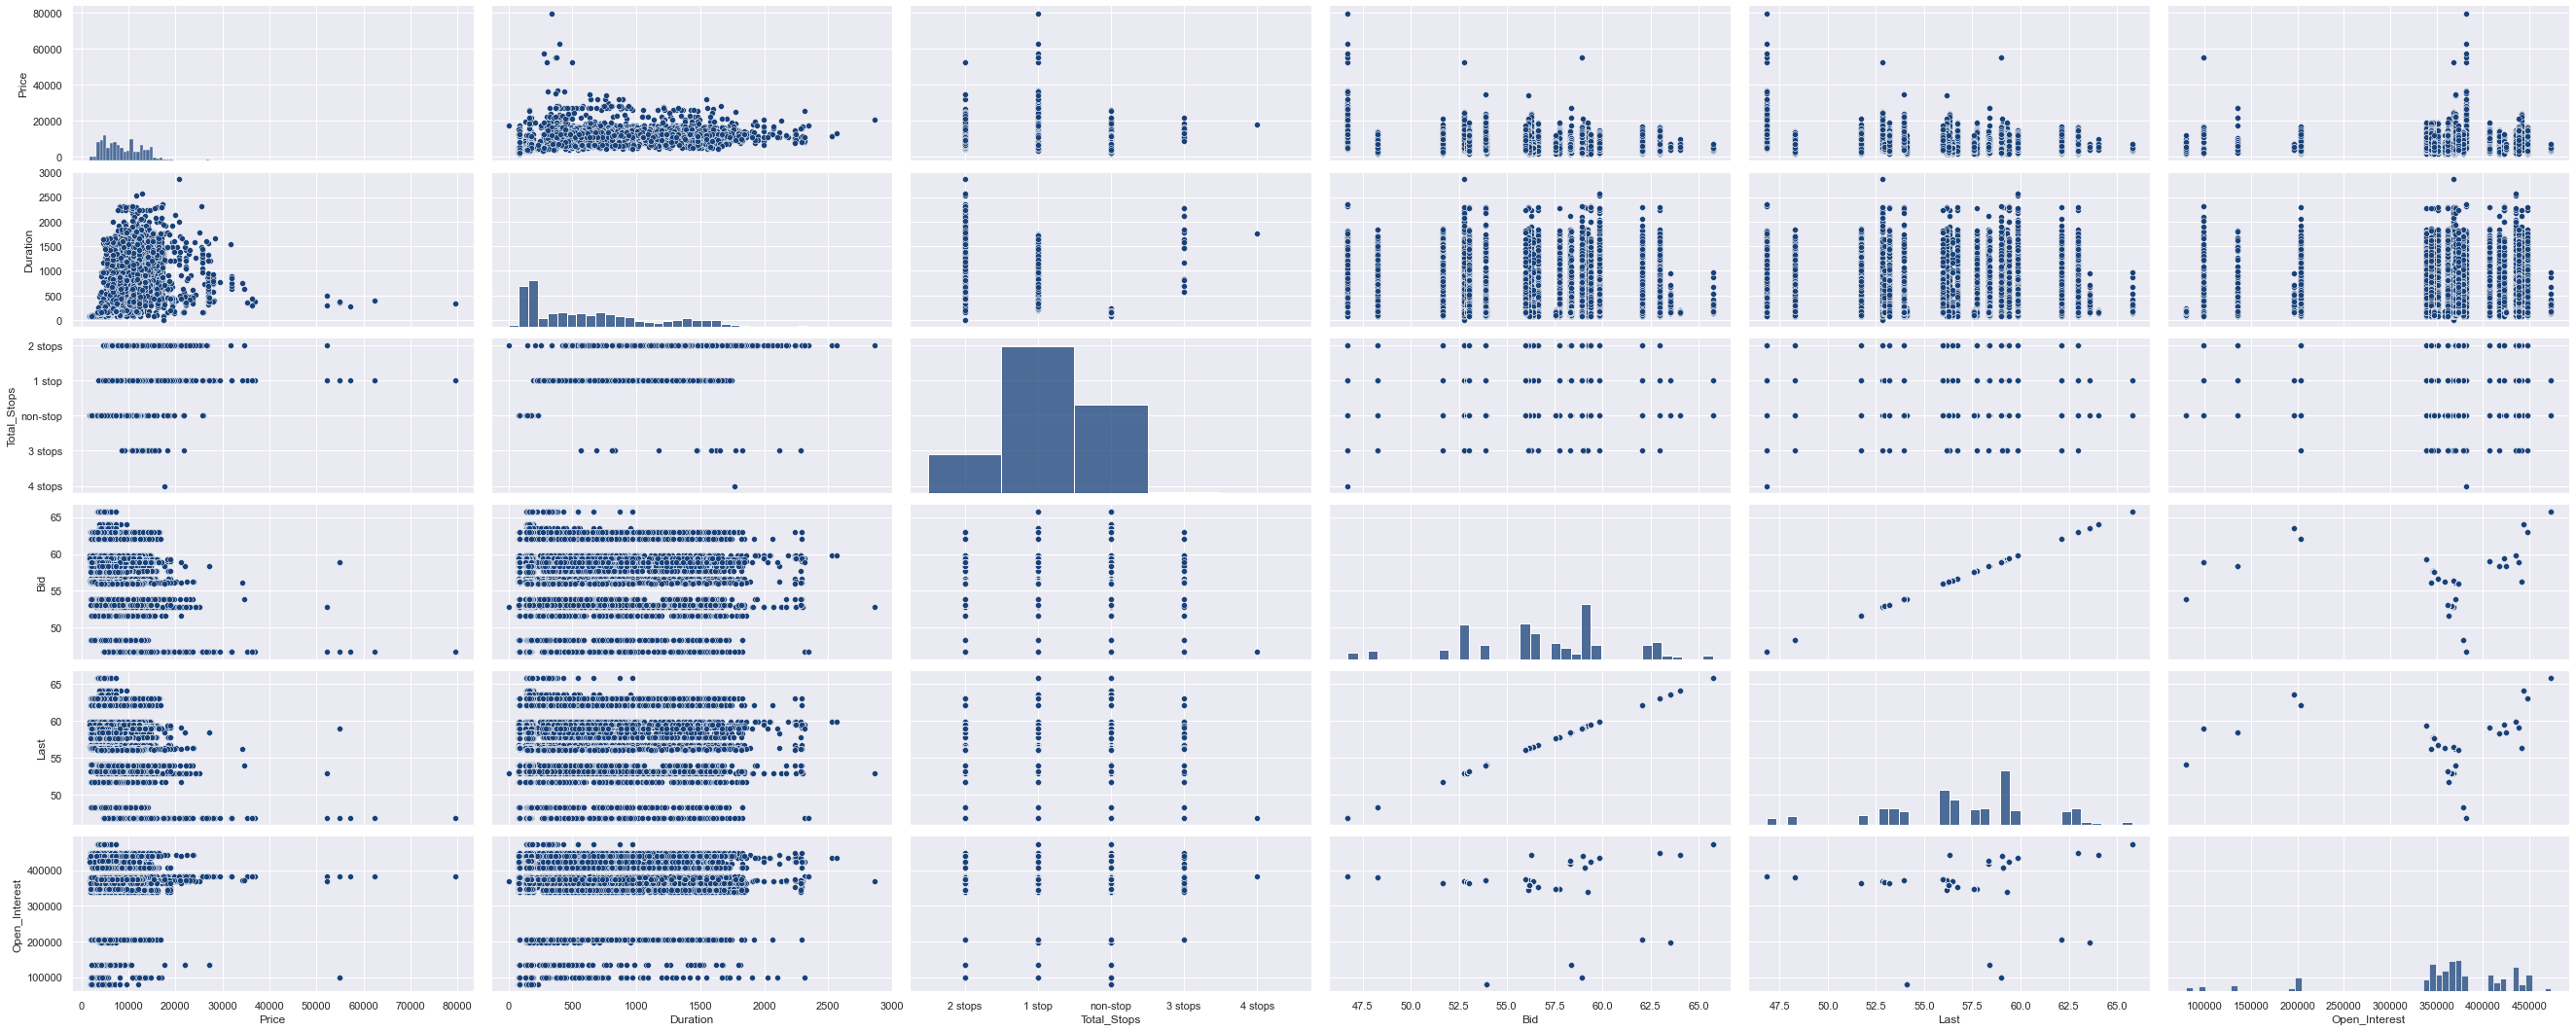

In [25]:
x = ["Price", "Duration", "Total_Stops", "Bid", "Last", "Open_Interest"]
y = ["Price", "Duration", "Total_Stops", "Bid", "Last", "Open_Interest"]
sns.set_theme(palette="gist_earth",style="darkgrid")
sns.pairplot(
    merged,
    x_vars = x,
    y_vars = y,
    height= 2.5,
    aspect= 2.5,
)

In [26]:
import math
count = 0
for i in crude["CVol"]:
  count+=1
  if math.isnan(i):
    print(count)
    

2288


Text(0.5, 1.0, 'Relation between open interest and CVol')

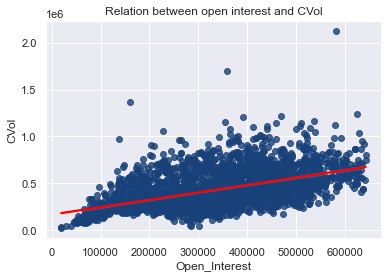

In [27]:
sns.regplot(x="Open_Interest", y="CVol", data=crude, line_kws={"color": "red"});
plt.title("Relation between open interest and CVol")

Open Interest, which refers to the total number of crude oil contracts outstanding on a given date, has a small corrolation to the number of times crude oil contracts trade on a given day. 

Contrary to our initial hypothesis, the price of airfare and the price of crude oil does not have a strong positive corrolation.

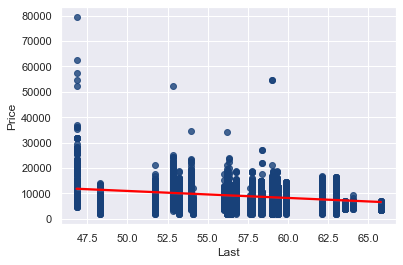

In [28]:
sns.regplot(x="Last", y="Price", data=merged, line_kws={"color": "red"});

In [29]:
merged["PricePerMin"] = merged.apply(lambda x: x["Price"]/x["Duration"], axis=1)

In [30]:
merged.PricePerMin.max()
merged = merged[merged.PricePerMin != 3465.6]

The corrolation also does not change when we consider price per minute traveled vs the price of crude oil. This is likley due to the fact that people purchase airfare tickets far in advance of the actual flight and so the prices may not reflect the true cost of flighing on that date.

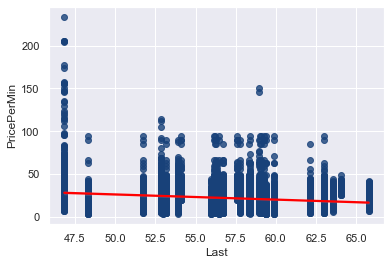

In [31]:
sns.regplot(x="Last", y="PricePerMin", data=merged, line_kws={"color": "red"})

As hypothesized, the price of airfare does have a positive corrolation with the duration of the flight but the corrolation is not as strong. This is lilkley due to the duration being a factor of actual flight time and time taken at stops. The time taken at stops will not factor into the price of operating the airline.

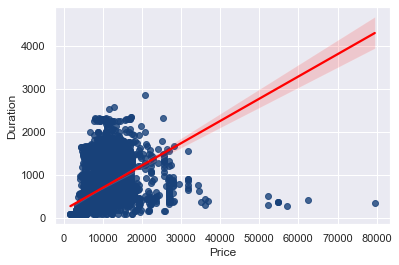

In [32]:
sns.regplot(x="Price", y="Duration", data=merged, line_kws={"color": "red"})